In [68]:
import json

with open('/opt/ml/Mycode/outputs/test_dataset_ng_fold1/predictions.json', 'r') as f:
    final = json.load(f)

with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_1.json', 'r') as f:
    answer1 = json.load(f)
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_2.json', 'r') as f:
    answer2 = json.load(f)
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_3.json', 'r') as f:
    answer3 = json.load(f)
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_4.json', 'r') as f:
    answer4 = json.load(f)
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_5.json', 'r') as f:
    answer5 = json.load(f)
    
answers = [answer1, answer2, answer3, answer4, answer5]

In [69]:
#1. original 방법
for key in final.keys() :
    answer_dic = {}
    for answer in answers :
        text = answer[key][0]['text']
        prob = answer[key][0]['probability']
        if text in answer_dic :
            answer_dic[text] += prob
        else :
            answer_dic[text] = prob
    voted_answer = sorted(answer_dic.items(), key=lambda x: x[1], reverse=True)[0][0]
    final[key] = voted_answer

In [70]:
import pandas as pd

df = pd.read_csv("/opt/ml/Mycode/inference_tagged.csv")
print(df["question"][0])

유령'은 어느 행성에서 지구로 왔는가?


In [71]:
#1. original 방법+정답에 없는거 없애기


for i, key in enumerate(final.keys()) :
    answer_dic = {}
    for answer in answers :
        for j in range(20) :
            if answer[key][j]['text'] not in df["question"][i] :
                num = j
                break
        text = answer[key][num]['text']
        prob = answer[key][num]['probability']
        if text in answer_dic :
            answer_dic[text] += prob
        else :
            answer_dic[text] = prob
    voted_answer = sorted(answer_dic.items(), key=lambda x: x[1], reverse=True)[0][0]
    final[key] = voted_answer

In [72]:
#2. 개수 우선, 개수가 같으면 점수가 가장 높은 것을 사용하는 방법 -> original에서 2개 차이남
for key in final.keys() :
    answer_dic = {}
    for answer in answers :
        text = answer[key][0]['text']
        prob = answer[key][0]['probability']
        if text in answer_dic :
            answer_dic[text][0] += 1
            answer_dic[text][1] = max(prob, answer_dic[text][1])
        else :
            answer_dic[text] = [1, prob]
    voted_answer = sorted(answer_dic.items(), key=lambda x: (x[1][0], x[1][1]), reverse=True)[0][0]
    final[key] = voted_answer

In [73]:
#1의 방법에서 start, end logit 활용하기 -> 1과 14개 다름
for key in final.keys() :
    answer_dic = {}
    for answer in answers :
        text = answer[key][0]['text']
        prob = answer[key][0]['start_logit'] + answer[key][0]['end_logit']
        if text in answer_dic :
            answer_dic[text] += prob
        else :
            answer_dic[text] = prob
    voted_answer = sorted(answer_dic.items(), key=lambda x: x[1], reverse=True)[0][0]
    final[key] = voted_answer

In [74]:
#1의 방법에서 start, end logit 곱하기로 활용하기 -> 바로 위와 20여개 정도 차이남. 1과도 많이 차이남.
for key in final.keys() :
    answer_dic = {}
    for answer in answers :
        text = answer[key][0]['text']
        prob = answer[key][0]['start_logit'] * answer[key][0]['end_logit']
        if text in answer_dic :
            answer_dic[text] += prob
        else :
            answer_dic[text] = prob
    voted_answer = sorted(answer_dic.items(), key=lambda x: x[1], reverse=True)[0][0]
    final[key] = voted_answer

In [75]:
#2의 방법에서 start, end logit 곱하기로 활용하기 -> 2와 아예 같음.
for key in final.keys() :
    answer_dic = {}
    for answer in answers :
        text = answer[key][0]['text']
        prob = answer[key][0]['start_logit'] * answer[key][0]['end_logit']
        if text in answer_dic :
            answer_dic[text][0] += 1
            answer_dic[text][1] = max(prob, answer_dic[text][1])
        else :
            answer_dic[text] = [1, prob]
    voted_answer = sorted(answer_dic.items(), key=lambda x: (x[1][0], x[1][1]), reverse=True)[0][0]
    final[key] = voted_answer

In [76]:
with open('/opt/ml/code/outputs/ng5qg1200/predictions_test.json', 'w') as f:
    json.dump(final, f, ensure_ascii = False)

# 아래부턴 csv 앙상블

In [2]:
import json

with open('/opt/ml/Mycode/outputs/test_dataset_ng_fold1/predictions.json', 'r') as f:
    final = json.load(f)

with open('/opt/ml/code/file_for_ensemble/69.170_1.json', 'r') as f:
    em69170_1 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/69.170_2.json', 'r') as f:
    em69170_2 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/68.330_1.json', 'r') as f:
    em68330_1 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/68.330_2.json', 'r') as f:
    em68330_2 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/67.920_1.json', 'r') as f:
    em67920_1 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/67.920_2.json', 'r') as f:
    em67920_2 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/67.080.json', 'r') as f:
    em67080 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/66.670_1.json', 'r') as f:
    em66670_1 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/66.670_2.json', 'r') as f:
    em66670_2 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/66.670_3.json', 'r') as f:
    em66670_3 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/66.250.json', 'r') as f:
    em66250 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/65.830_1.json', 'r') as f:
    em65830_1 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/65.830_2.json', 'r') as f:
    em65830_2 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/65.830_3.json', 'r') as f:
    em65830_3 = json.load(f)
with open('/opt/ml/code/file_for_ensemble/65.000.json', 'r') as f:
    em65000 = json.load(f)

answers = [em69170_1, em69170_2, em68330_1, em68330_2, em67920_1, em67080, em66670_1, em66670_2, em66250, em65830_1, em65830_2, em65830_3, em65000]

In [3]:
def make_key(dic) : 
    for key in dic.keys() :
        dic[key] = dic[key][0]['text']
    return dic

In [4]:
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_1.json', 'r') as f:
    ngqg_answer1 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_2.json', 'r') as f:
    ngqg_answer2 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_3.json', 'r') as f:
    ngqg_answer3 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_4.json', 'r') as f:
    ngqg_answer4 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5qg1200/nbest_predictions_5.json', 'r') as f:
    ngqg_answer5 = make_key(json.load(f))

with open('/opt/ml/Mycode/outputs/test_dataset_ng_fold1/nbest_predictions.json', 'r') as f:
    ng3_answer1 = make_key(json.load(f))
with open('/opt/ml/Mycode/outputs/test_dataset_ng_fold2/nbest_predictions.json', 'r') as f:
    ng3_answer2 = make_key(json.load(f))
with open('/opt/ml/Mycode/outputs/test_dataset_ng_fold3/nbest_predictions.json', 'r') as f:
    ng3_answer3 = make_key(json.load(f))
with open('/opt/ml/Mycode/outputs/test_dataset_ng_fold4/nbest_predictions.json', 'r') as f:
    ng3_answer4 = make_key(json.load(f))
with open('/opt/ml/Mycode/outputs/test_dataset_ng_fold5/nbest_predictions.json', 'r') as f:
    ng3_answer5 = make_key(json.load(f))

with open('/opt/ml/code/outputs/ng5only/nbest_predictions_fold1_ng5.json', 'r') as f:
    ng5_answer1 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5only/nbest_predictions_fold2_ng5.json', 'r') as f:
    ng5_answer2 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5only/nbest_predictions_fold3_ng5.json', 'r') as f:
    ng5_answer3 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5only/nbest_predictions_fold4_ng5.json', 'r') as f:
    ng5_answer4 = make_key(json.load(f))
with open('/opt/ml/code/outputs/ng5only/nbest_predictions_fold5_ng5.json', 'r') as f:
    ng5_answer5 = make_key(json.load(f))



fold_ingredients = [ngqg_answer1, ngqg_answer2, ngqg_answer3, ngqg_answer4, ngqg_answer5, ng3_answer1, ng3_answer2, ng3_answer3, ng3_answer4, ng3_answer5, ng5_answer1, ng5_answer2, ng5_answer3, ng5_answer4, ng5_answer5]

In [5]:
def difference(a, b) :
    count = 0
    for key in final.keys() :
        if a[key] != b[key] :
            count += 1
    return count

In [6]:
print(difference(em69170_1, em69170_2))

142


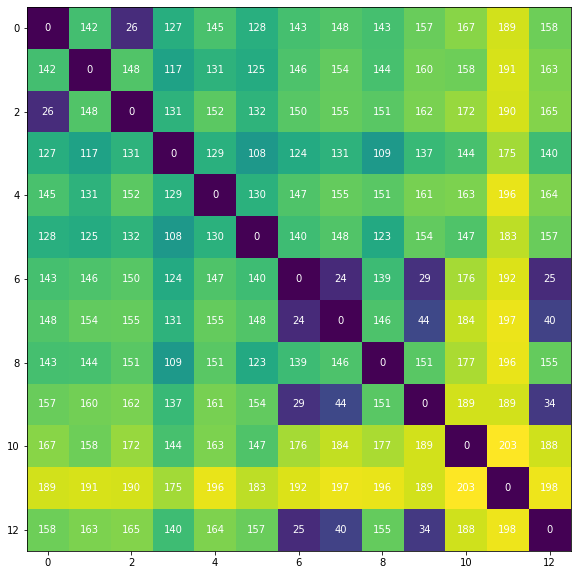

In [7]:
import numpy as np
import matplotlib.pyplot as plt

graph = np.array([[difference(i, j) for j in answers] for i in answers])

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(graph)

# Loop over data dimensions and create text annotations.
for i in range(len(answers)):
    for j in range(len(answers)):
        text = ax.text(j, i, graph[i, j],
                       ha="center", va="center", color="w")
plt.show()

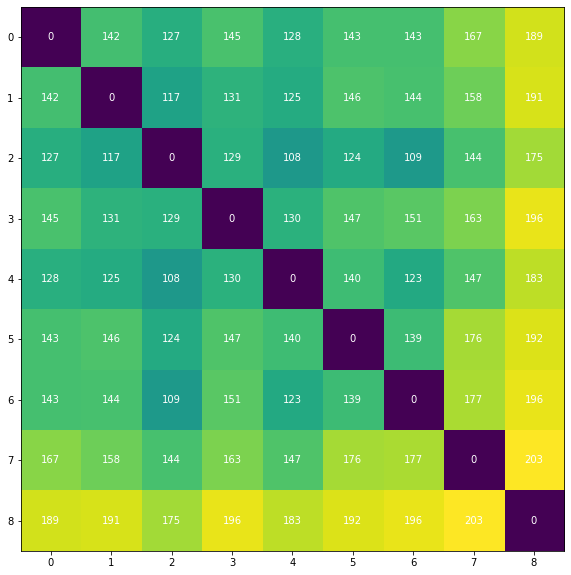

In [8]:
#100개 이하인거 다 빼보자.

answers = [em69170_1, em69170_2, em68330_2, em67920_1, em67080, em66670_1, em66250, em65830_2, em65830_3]

graph = np.array([[difference(i, j) for j in answers] for i in answers])

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(graph)

# Loop over data dimensions and create text annotations.
for i in range(len(answers)):
    for j in range(len(answers)):
        text = ax.text(j, i, graph[i, j],
                       ha="center", va="center", color="w")
plt.show()

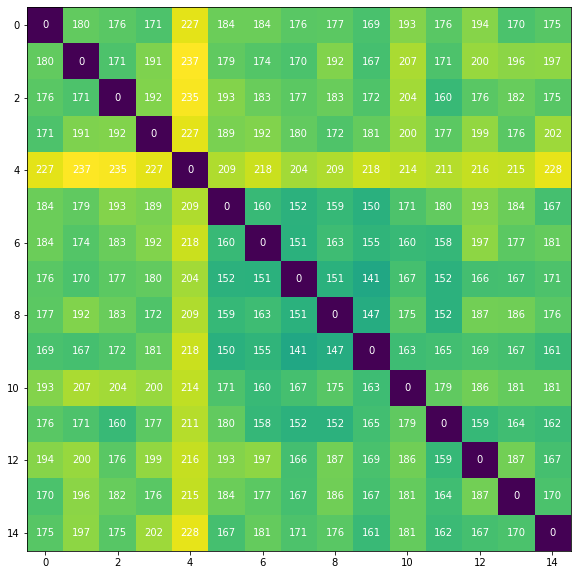

In [9]:
graph = np.array([[difference(i, j) for j in fold_ingredients] for i in fold_ingredients])

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(graph)

# Loop over data dimensions and create text annotations.
for i in range(len(fold_ingredients)):
    for j in range(len(fold_ingredients)):
        text = ax.text(j, i, graph[i, j],
                       ha="center", va="center", color="w")
plt.show()

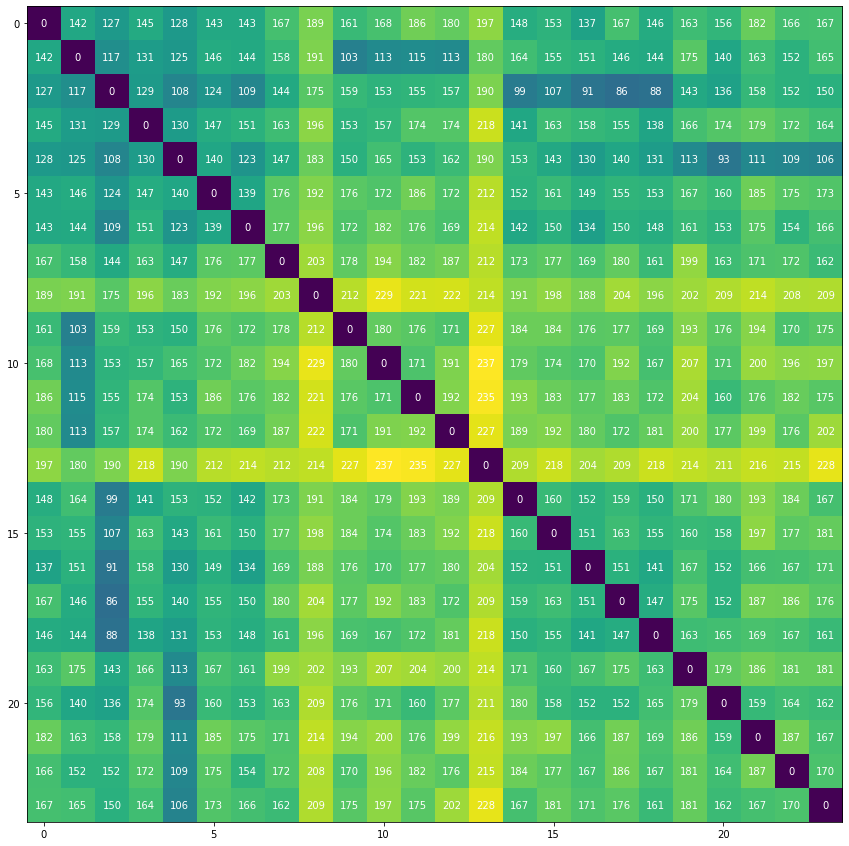

In [10]:
answers = [em69170_1, em69170_2, em68330_2, em67920_1, em67080, em66670_1, em66250, em65830_2, em65830_3]
answers.extend(fold_ingredients)

graph = np.array([[difference(i, j) for j in answers] for i in answers])

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(graph)

# Loop over data dimensions and create text annotations.
for i in range(len(answers)):
    for j in range(len(answers)):
        text = ax.text(j, i, graph[i, j],
                       ha="center", va="center", color="w")
plt.show()

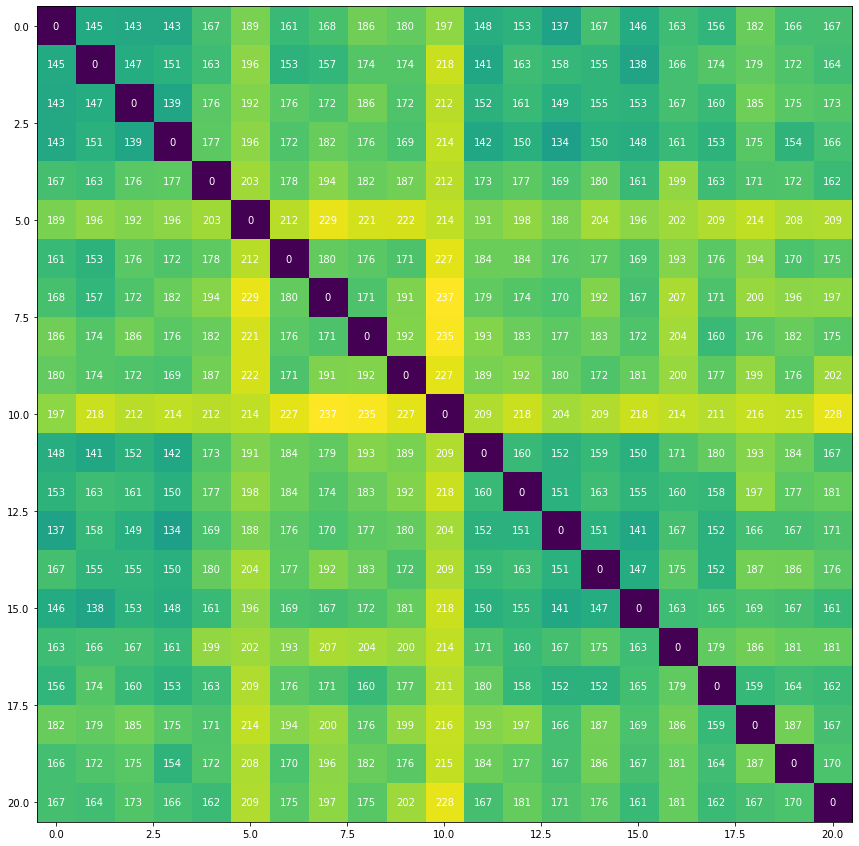

In [11]:
# k-fold 합산본 3개를 뺀다면?

answers = [em69170_1, em67920_1, em66670_1, em66250, em65830_2, em65830_3]
answers.extend(fold_ingredients)

graph = np.array([[difference(i, j) for j in answers] for i in answers])

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(graph)

# Loop over data dimensions and create text annotations.
for i in range(len(answers)):
    for j in range(len(answers)):
        text = ax.text(j, i, graph[i, j],
                       ha="center", va="center", color="w")
plt.show()

In [24]:
for i, key in enumerate(final.keys()) :
    answer_dic = {}
    for j, answer in enumerate(answers) :
        text = answer[key]
        if text in answer_dic :
            answer_dic[text][0] += 1
        else :
            answer_dic[text] = [1, j]
    sorted_list = sorted(answer_dic.items(), key=lambda x: (x[1][0], -x[1][1]), reverse=True)
    voted_answer = sorted_list[0][0]
    final[key] = voted_answer
    try : 
        loser = sorted_list[1][0]
        if sorted_list[0][1][0] == sorted_list[1][1][0] :
            print("key: ", key, " winner: ", voted_answer, " loser: ", loser, " count: ", sorted_list[0][1][0], " question num: ", i+2)
            print(sorted_list)
            print()
    except : continue

key:  mrc-0-003970  winner:  센리 선  loser:  교토 본선과 센리 선  count:  6  question num:  163
[('센리 선', [6, 0]), ('교토 본선과 센리 선', [6, 2]), ('교토 본선', [6, 6]), ('도로 7호선', [3, 3])]

key:  mrc-1-000155  winner:  1996년 6월 24일  loser:  2013년 7월  count:  7  question num:  270
[('1996년 6월 24일', [7, 0]), ('2013년 7월', [7, 3]), ('24일', [4, 6]), ('1996년', [3, 1])]

key:  mrc-1-000889  winner:  667년 금산전투  loser:  금산전투  count:  6  question num:  311
[('667년 금산전투', [6, 0]), ('금산전투', [6, 3]), ('645년', [3, 8]), ('667년', [2, 1]), ('귀주대첩', [1, 5]), ('천문령 전투', [1, 7]), ('667년의 금산전투', [1, 13]), ('주필산 전투', [1, 18])]

key:  mrc-0-005108  winner:  아도니스  loser:  아프로디테  count:  5  question num:  427
[('아도니스', [5, 0]), ('아프로디테', [5, 5]), ('비너스', [3, 2]), ('아프로디테의 사랑을 받았던 소년 아도니스', [2, 1]), ('에로스', [2, 3]), ('사랑의 신 에로스', [2, 9]), ('크리스티안 로젠크로이츠', [1, 13]), ('나이팅게일', [1, 20])]

key:  mrc-0-000527  winner:  복  loser:  〈신정국문(新訂國文)〉  count:  3  question num:  468
[('복', [3, 0]), ('〈신정국문(新訂國文)〉', [3, 8]), ('일제강점기에', [3, 13]), 

In [19]:
with open('/opt/ml/code/outputs/ng5qg1200/predictions_test3.json', 'w') as f:
    json.dump(final, f, ensure_ascii = False)